# UTS

#### Di praktek ini akan banyak melakukan Feature Engineering dan membuat fitur sendiri, penjelasan ada selagi jalan. Disini kita akan mengelompokkan customer.

In [202]:
import pandas as pd

In [203]:
path = 'UTSClustering.csv'
df = pd.read_csv(path, encoding='iso-8859-1')


### Data Cleaning

In [204]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Ada beberapa observasi yang didapatkan disini, yaitu:
- Tiap sale yang sama (nomor invoice yang sama) terdapat di beberapa row berturut.
- Customer ID juga sama.
- Deskripsi seharusnya sama unik dengan Stock Code.

Untuk mendapatkan pengeluaran per customer, kita dapat mengaggregasi fitur-fitur yang ada seperti mengalikan Quantity dan UnitPrice, lalu menjumlahkan totalnya.

In [205]:
cleaned_df = df.copy()

In [206]:
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Kita drop row kosong terlebih dahulu

In [207]:
cleaned_df.dropna(subset=['CustomerID'], inplace=True)


In [208]:
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Ada Quantity negatif, seharusnya tidak ada.

In [209]:
print(f"Number of rows with negative Quantity before dropping: {(cleaned_df['Quantity'] < 0).sum()}")
cleaned_df = cleaned_df[cleaned_df['Quantity'] >= 0]
print(f"Number of rows after dropping negative Quantity: {len(cleaned_df)}")


Number of rows with negative Quantity before dropping: 8905
Number of rows after dropping negative Quantity: 397924


In [210]:
cleaned_df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### Ada price yang 0, mari kita cek

In [211]:
len(cleaned_df[cleaned_df['UnitPrice'] == 0])

40

In [212]:
cleaned_df[cleaned_df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [213]:
print(f"Number of rows before dropping UnitPrice = 0: {len(cleaned_df)}")
cleaned_df = cleaned_df[cleaned_df['UnitPrice'] > 0]
print(f"Number of rows after dropping UnitPrice = 0: {len(cleaned_df)}")

Number of rows before dropping UnitPrice = 0: 397924
Number of rows after dropping UnitPrice = 0: 397884


#### Ada beberapa StockCode yang tidak konsisten, yaitu selain M, PADS, dan lainnya yang selain format 5 digit angka atau 5 digit angka dengan beberapa huruf.

In [214]:
invalid_stockcodes = cleaned_df[~cleaned_df['StockCode'].str.match(r'^\d{5}[A-Za-z]*$')]

print(f"Number of rows with invalid StockCode format: {len(invalid_stockcodes)}")

print("\nUnique invalid StockCodes:")
print(invalid_stockcodes['StockCode'].value_counts())

print(f"\nNumber of rows before dropping invalid StockCodes: {len(cleaned_df)}")
cleaned_df = cleaned_df[cleaned_df['StockCode'].str.match(r'^\d{5}[A-Za-z]*$')]
print(f"Number of rows after dropping invalid StockCodes: {len(cleaned_df)}")


Number of rows with invalid StockCode format: 1547

Unique invalid StockCodes:
StockCode
POST            1099
M                284
C2               133
DOT               16
BANK CHARGES      12
PADS               3
Name: count, dtype: int64

Number of rows before dropping invalid StockCodes: 397884
Number of rows after dropping invalid StockCodes: 396337


In [215]:
cleaned_df.describe()

,Quantity,UnitPrice,CustomerID
count,396337.000000,396337.000000,396337.000000
mean,13.012547,2.868222,15301.689416
std,179.641245,4.264663,1709.961948
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16803.000000
max,80995.000000,649.500000,18287.000000


### Feature Engineering
#### Kita akan menggabungkan beberapa fitur (atau membuat fitur baru) untuk membuat berapa pengeluaran tiap customer.

Pertama, kita hitung berapa total sales dari tiap row

In [216]:
cleaned_df["TotalSales"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]

cleaned_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [217]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396337 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396337 non-null  object 
 1   StockCode    396337 non-null  object 
 2   Description  396337 non-null  object 
 3   Quantity     396337 non-null  int64  
 4   InvoiceDate  396337 non-null  object 
 5   UnitPrice    396337 non-null  float64
 6   CustomerID   396337 non-null  float64
 7   Country      396337 non-null  object 
 8   TotalSales   396337 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.2+ MB


#### Kita dapat mengubah InvoiceDate menjadi format Date yang benar

In [218]:
cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'], format='%m/%d/%Y %H:%M')

print("InvoiceDate after conversion:")
print(cleaned_df['InvoiceDate'].head())


InvoiceDate after conversion:
0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [219]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396337 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396337 non-null  object        
 1   StockCode    396337 non-null  object        
 2   Description  396337 non-null  object        
 3   Quantity     396337 non-null  int64         
 4   InvoiceDate  396337 non-null  datetime64[ns]
 5   UnitPrice    396337 non-null  float64       
 6   CustomerID   396337 non-null  float64       
 7   Country      396337 non-null  object        
 8   TotalSales   396337 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.2+ MB


In [220]:
aggregated_df = cleaned_df.groupby(by="CustomerID", as_index=False).agg(
    TotalSpent=("TotalSales", "sum"),
    Frequency=("InvoiceNo", "nunique"),
    MostRecentInvoiceDate=("InvoiceDate", "max")
)

Yang dilakukan di atas adalah pertama kita menggabungkan semua berdasarkan CustomerID, isinya adalah total dari TotalSales yang kita buat tadi untuk menghitung berapa pengeluaran Customer tersebut, lalu menghitung berapa kali Customer tersebut belanja dengan menghitung berapa Invoice unik yang ada, lalu menentukan berapa terakhir kali Customer datang dan ini bisa digunakan sebagai Recency.

In [221]:
aggregated_df

,CustomerID,TotalSpent,Frequency,MostRecentInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
...,...,...,...,...
4329,18280.0,180.60,1,2011-03-07 09:52:00
4330,18281.0,80.82,1,2011-06-12 10:53:00
4331,18282.0,178.05,2,2011-12-02 11:43:00
4332,18283.0,2088.93,16,2011-12-06 12:02:00


Untuk menentukan recency, kita dapat menggunakan Invoice terakhir saja sebagai titik relatif.

In [222]:
most_recent_date = aggregated_df['MostRecentInvoiceDate'].max()

most_recent_date

Timestamp('2011-12-09 12:50:00')

In [223]:
aggregated_df['DaysSinceLastPurchase'] = (most_recent_date - aggregated_df['MostRecentInvoiceDate']).dt.days

aggregated_df.head(10)


,CustomerID,TotalSpent,Frequency,MostRecentInvoiceDate,DaysSinceLastPurchase
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309
5,12352.0,1385.74,7,2011-11-03 14:37:00,35
6,12353.0,89.00,1,2011-05-19 17:47:00,203
7,12354.0,1079.40,1,2011-04-21 13:11:00,231
8,12355.0,459.40,1,2011-05-09 13:49:00,213
9,12356.0,2487.43,3,2011-11-17 08:40:00,22


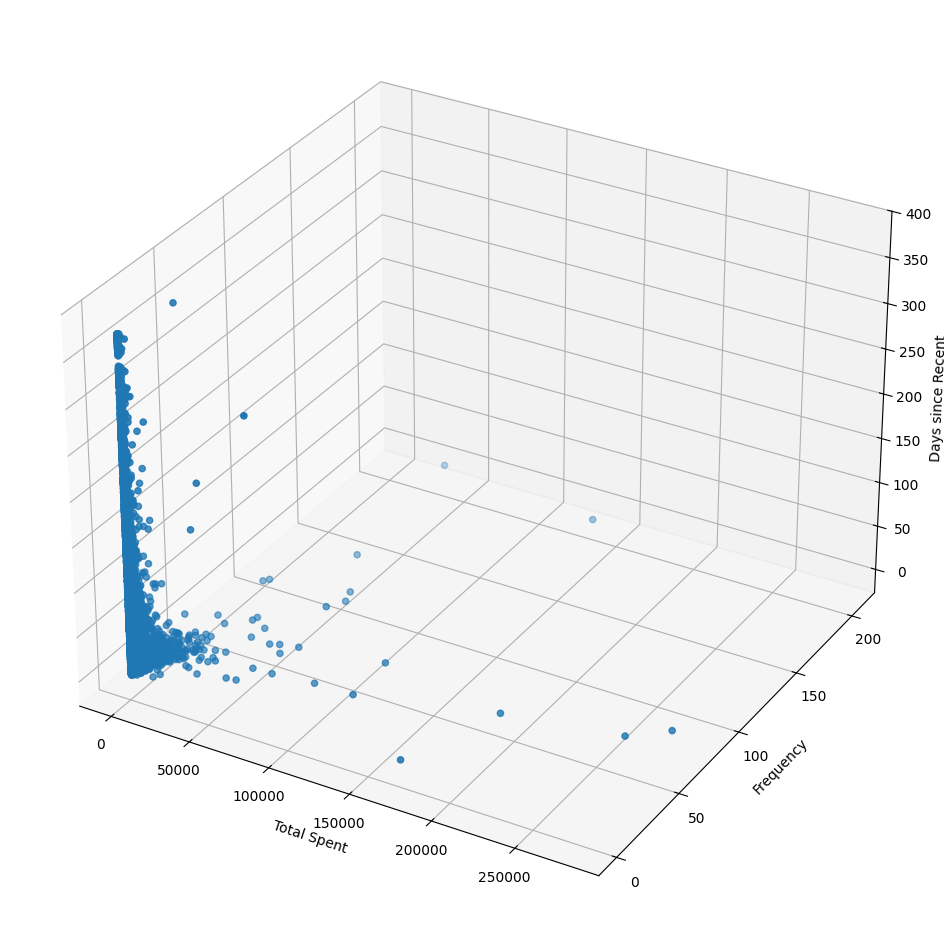

In [224]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(aggregated_df["TotalSpent"], aggregated_df["Frequency"], aggregated_df["DaysSinceLastPurchase"])

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")

plt.show()

Sepertinya data menumpuk, mari kita cek outlier

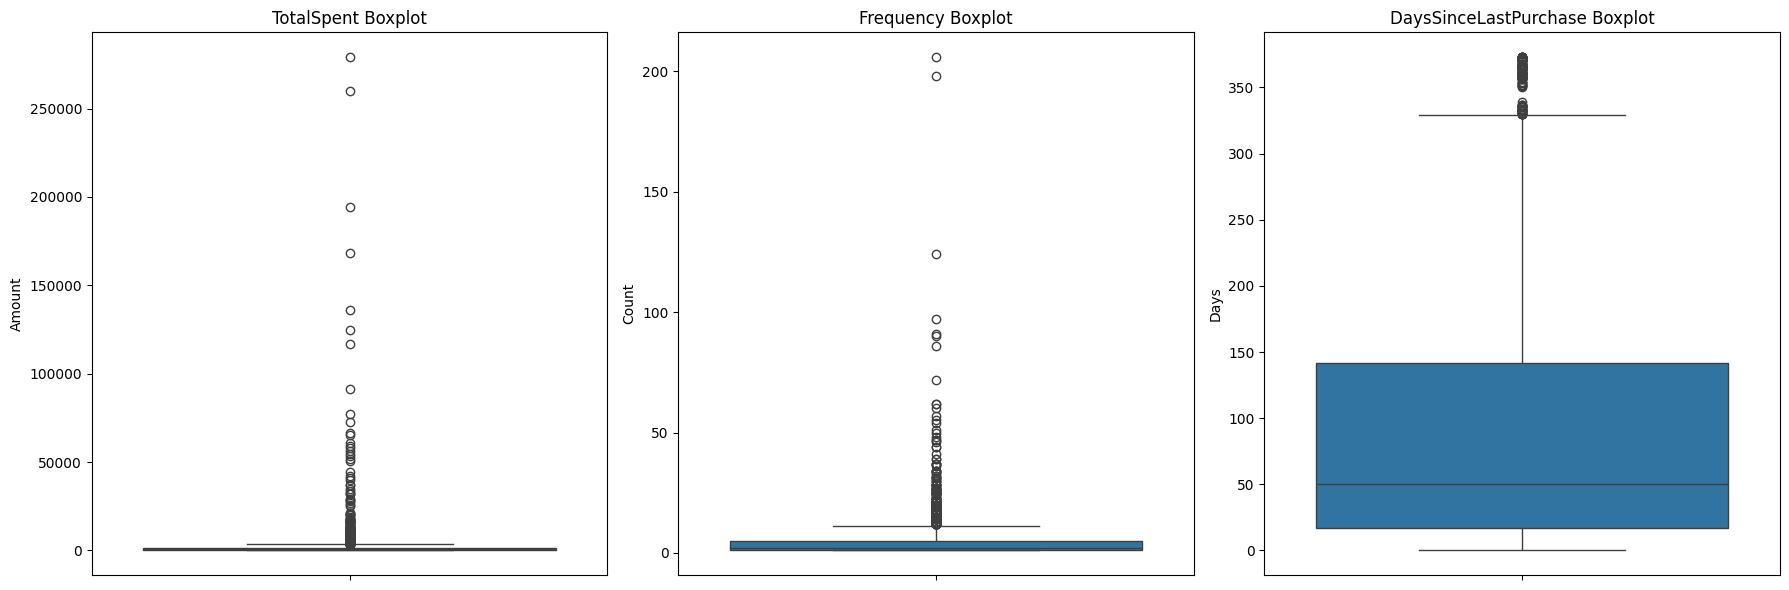

Statistics for each feature:
          TotalSpent    Frequency  DaysSinceLastPurchase
count    4334.000000  4334.000000            4334.000000
mean     2021.473616     4.245962              91.703046
std      8907.501378     7.634989             100.177047
min         3.750000     1.000000               0.000000
25%       305.560000     1.000000              17.000000
50%       668.125000     2.000000              50.000000
75%      1631.622500     5.000000             142.000000
max    279138.020000   206.000000             373.000000

Number of outliers in each feature:
TotalSpent: 425 outliers (9.81% of data)
Frequency: 278 outliers (6.41% of data)
DaysSinceLastPurchase: 152 outliers (3.51% of data)


In [225]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=aggregated_df['TotalSpent'], ax=axes[0])
axes[0].set_title('TotalSpent Boxplot')
axes[0].set_ylabel('Amount')

sns.boxplot(y=aggregated_df['Frequency'], ax=axes[1])
axes[1].set_title('Frequency Boxplot')
axes[1].set_ylabel('Count')

sns.boxplot(y=aggregated_df['DaysSinceLastPurchase'], ax=axes[2])
axes[2].set_title('DaysSinceLastPurchase Boxplot')
axes[2].set_ylabel('Days')

plt.tight_layout()
plt.show()

stats = aggregated_df[['TotalSpent', 'Frequency', 'DaysSinceLastPurchase']].describe()
print("Statistics for each feature:")
print(stats)

Q1 = aggregated_df[['TotalSpent', 'Frequency', 'DaysSinceLastPurchase']].quantile(0.25)
Q3 = aggregated_df[['TotalSpent', 'Frequency', 'DaysSinceLastPurchase']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = {
    'TotalSpent': ((aggregated_df['TotalSpent'] < lower_bound['TotalSpent']) | 
                   (aggregated_df['TotalSpent'] > upper_bound['TotalSpent'])).sum(),
    'Frequency': ((aggregated_df['Frequency'] < lower_bound['Frequency']) | 
                 (aggregated_df['Frequency'] > upper_bound['Frequency'])).sum(),
    'DaysSinceLastPurchase': ((aggregated_df['DaysSinceLastPurchase'] < lower_bound['DaysSinceLastPurchase']) | 
                             (aggregated_df['DaysSinceLastPurchase'] > upper_bound['DaysSinceLastPurchase'])).sum()
}

print("\nNumber of outliers in each feature:")
for feature, count in outliers_count.items():
    print(f"{feature}: {count} outliers ({count/len(aggregated_df)*100:.2f}% of data)")


#### Disini terlihat outlier lumayan besar, jadi mungkin kita tidak drop, tapi pisahkan saja ke dataframe lain.

In [226]:
non_outlier_mask = (
    (aggregated_df['TotalSpent'] >= lower_bound['TotalSpent']) & 
    (aggregated_df['TotalSpent'] <= upper_bound['TotalSpent']) &
    (aggregated_df['Frequency'] >= lower_bound['Frequency']) & 
    (aggregated_df['Frequency'] <= upper_bound['Frequency']) &
    (aggregated_df['DaysSinceLastPurchase'] >= lower_bound['DaysSinceLastPurchase']) & 
    (aggregated_df['DaysSinceLastPurchase'] <= upper_bound['DaysSinceLastPurchase'])
)

non_outlier_df = aggregated_df[non_outlier_mask].copy()
outlier_df = aggregated_df[~non_outlier_mask].copy()

print(f"Non-outlier dataframe shape: {non_outlier_df.shape}")
print(f"Outlier dataframe shape: {outlier_df.shape}")
print(f"Percentage of data in non-outlier dataframe: {len(non_outlier_df)/len(aggregated_df)*100:.2f}%")
print(f"Percentage of data in outlier dataframe: {len(outlier_df)/len(aggregated_df)*100:.2f}%")


Non-outlier dataframe shape: (3712, 5)
Outlier dataframe shape: (622, 5)
Percentage of data in non-outlier dataframe: 85.65%
Percentage of data in outlier dataframe: 14.35%


Text(0.5, 0.92, 'Non-Outlier Data Visualization')

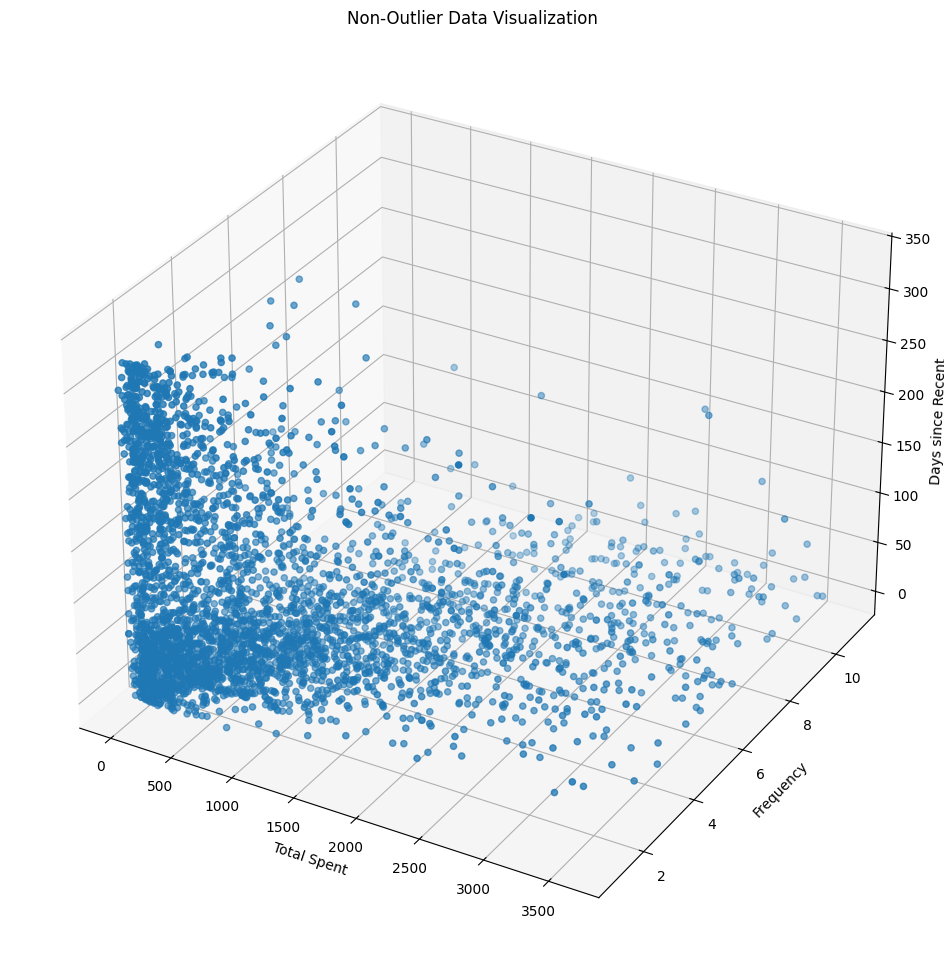

In [227]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outlier_df["TotalSpent"], non_outlier_df["Frequency"], non_outlier_df["DaysSinceLastPurchase"])

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("Non-Outlier Data Visualization")

Data sudah terlihat, mari kita lanjut ke clustrering.

In [228]:
non_outlier_df

,CustomerID,TotalSpent,Frequency,MostRecentInvoiceDate,DaysSinceLastPurchase
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309
5,12352.0,1385.74,7,2011-11-03 14:37:00,35
6,12353.0,89.00,1,2011-05-19 17:47:00,203
...,...,...,...,...,...
4328,18278.0,173.90,1,2011-09-27 11:58:00,73
4329,18280.0,180.60,1,2011-03-07 09:52:00,277
4330,18281.0,80.82,1,2011-06-12 10:53:00,180
4331,18282.0,178.05,2,2011-12-02 11:43:00,7


### Transformasi Data

#### Setelah ini kita akan transformasi data dengan StandardScaler agar data terskala

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_non_outlier = scaler.fit_transform(non_outlier_df[['TotalSpent', 'Frequency', 'DaysSinceLastPurchase']])

scaled_non_outlier_df = pd.DataFrame(scaled_non_outlier, index=non_outlier_df.index, columns=['TotalSpent', 'Frequency', 'DaysSinceLastPurchase'])

scaled_non_outlier_df.head()



,TotalSpent,Frequency,DaysSinceLastPurchase
2,0.702674,0.539499,-0.173023
3,0.728062,-0.834041,-0.800375
4,-0.725919,-0.834041,2.459615
5,0.638297,1.913039,-0.609929
6,-0.982677,-0.834041,1.272127


Data non-outlier telah discaling dan index tetap digunakan sesuai non-outlier, dapat dilihat tidak ada index 1, karena row tersebut merupakan outlier

Text(0.5, 0.92, 'Non-Outlier Data Visualization')

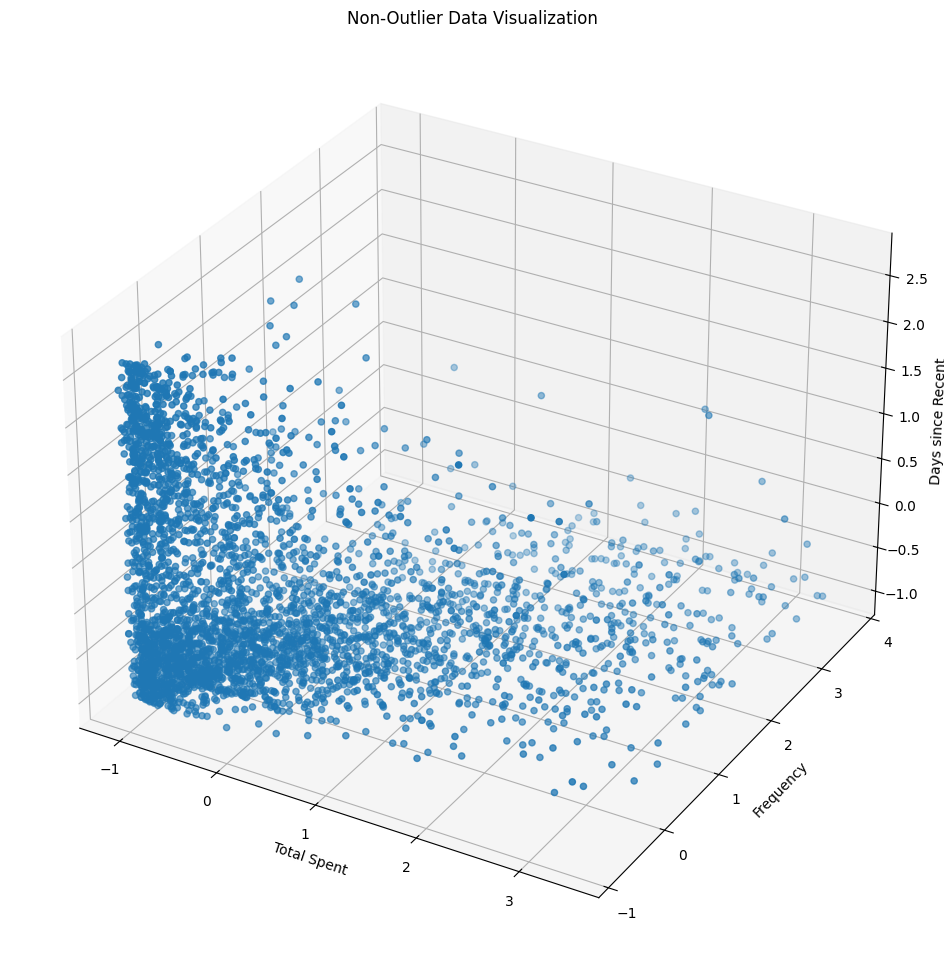

In [230]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_non_outlier_df["TotalSpent"], scaled_non_outlier_df["Frequency"], scaled_non_outlier_df["DaysSinceLastPurchase"])

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("Non-Outlier Data Visualization")

Export dataset untuk dicoba model clustering lain

In [231]:
scaled_non_outlier_df_with_id = scaled_non_outlier_df.copy()
scaled_non_outlier_df_with_id['CustomerID'] = non_outlier_df['CustomerID']
scaled_non_outlier_df.to_csv('scaled_non_outlier_data.csv')
scaled_non_outlier_df_with_id.to_csv('scaled_non_outlier_data_with_id.csv')

## Clustering
### K Means

Pertama, kita akan menentukan jumlah cluster optimal dengan elbow method dan silhouette score.

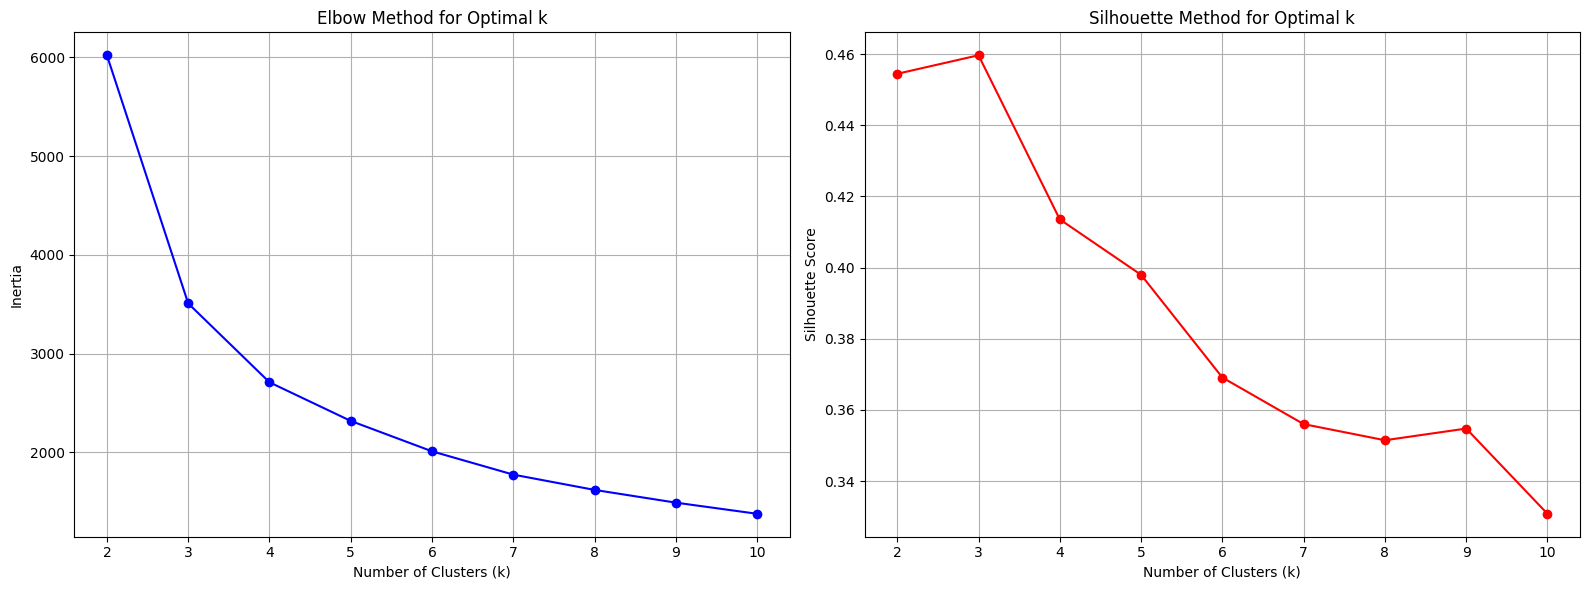

In [232]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X = scaled_non_outlier_df.values

inertia_values = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
    inertia_values.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(k_range, inertia_values, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method for Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()


Dari Elbow Method, penurunan drastis berada dari 2 ke 3, namun dari 4 ke 5 adalah ketika mulai flat curvenya. Dari Silhouette score, K = 3 paling tinggi, namun jika digabung dengan Elbow, dapat dilihat bahwa 4 lebih tinggi nilainya dari 5. Kita akan coba satu per satu.

Cluster Centers:
Cluster 0: [ 0.46861235  0.49835029 -0.49355615]
Cluster 1: [-0.59145805 -0.61864457  1.57905578]
Cluster 2: [-0.56373132 -0.55353552 -0.43324058]
Cluster 3: [ 1.93531846  1.89979545 -0.65971656]

Number of customers in each cluster:
Cluster
0     879
1     880
2    1469
3     484
Name: count, dtype: int64


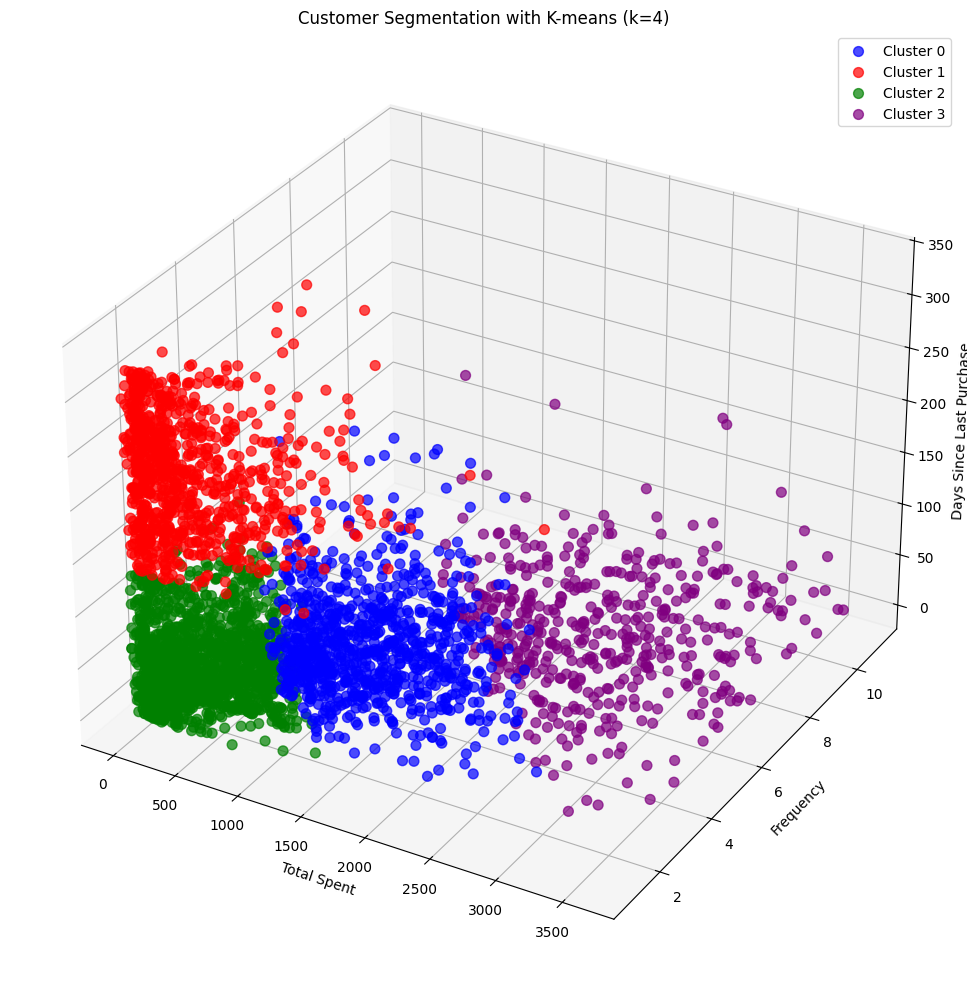


Cluster Summary Statistics:

Cluster 0:
        TotalSpent   Frequency  DaysSinceLastPurchase
count   879.000000  879.000000             879.000000
mean   1249.996337    3.910125              45.387941
std     472.322352    1.198851              43.026303
min      70.020000    1.000000               0.000000
25%     895.895000    3.000000              14.000000
50%    1194.730000    4.000000              30.000000
75%    1543.135000    5.000000              67.500000
max    3096.000000    8.000000             218.000000

Cluster 1:
        TotalSpent   Frequency  DaysSinceLastPurchase
count   880.000000  880.000000             880.000000
mean    401.965500    1.470455             230.397727
std     344.098451    0.787583              52.546948
min       3.750000    1.000000             140.000000
25%     166.705000    1.000000             184.000000
50%     309.925000    1.000000             232.000000
75%     514.717500    2.000000             273.250000
max    3202.920000    6.00000

In [233]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

non_outlier_df['Cluster'] = clusters

cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {center}")

cluster_counts = non_outlier_df['Cluster'].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'purple']

for cluster_num in range(4):
    cluster_data = non_outlier_df[non_outlier_df['Cluster'] == cluster_num]
    
    ax.scatter(
        cluster_data['TotalSpent'], 
        cluster_data['Frequency'], 
        cluster_data['DaysSinceLastPurchase'],
        c=colors[cluster_num],
        label=f'Cluster {cluster_num}',
        alpha=0.7,
        s=50
    )

ax.set_xlabel('Total Spent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Days Since Last Purchase')
ax.set_title('Customer Segmentation with K-means (k=4)')

ax.legend()

plt.tight_layout()
plt.show()

print("\nCluster Summary Statistics:")
for i in range(4):
    print(f"\nCluster {i}:")
    cluster_stats = non_outlier_df[non_outlier_df['Cluster'] == i][['TotalSpent', 'Frequency', 'DaysSinceLastPurchase']].describe()
    print(cluster_stats)


In [235]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = non_outlier_df[['TotalSpent', 'Frequency', 'DaysSinceLastPurchase']].values

silhouette_avg = silhouette_score(X, non_outlier_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

db_score = davies_bouldin_score(X, non_outlier_df['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.4f}")

ch_score = calinski_harabasz_score(X, non_outlier_df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

print("\nClustering Evaluation Summary for k=4:")
print("-" * 40)
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, range: -1 to 1)")
print(f"Davies-Bouldin Index: {db_score:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {ch_score:.4f} (Higher is better)")


Silhouette Score: 0.1817
Davies-Bouldin Index: 1.6763
Calinski-Harabasz Index: 3696.9098

Clustering Evaluation Summary for k=4:
----------------------------------------
Silhouette Score: 0.1817 (Higher is better, range: -1 to 1)
Davies-Bouldin Index: 1.6763 (Lower is better)
Calinski-Harabasz Index: 3696.9098 (Higher is better)


Nanti kita bandingkan index-index ini dengan metode Clustering lain.

### Analisis Hasil Clustering

Ada 4 cluster berdasarkan 3 fitur, dan cluster-cluster tersebut dapat kita interpretasikan seperti ini:
1. Cluster customer sering belanja (Frequent Buyer), Total Spent tinggi karena sering belanja
2. Cluster customer lumayan sering belanja (Medium Frequency Buyer), Total Spent menengah
3. Cluster customer sedikit belanja namun baru (Recent/New Customer), Total Spent masih sedikit, mungkin akan belanja lagi
4. Cluster customer sedikit belanja dan lama (Least Frequent and Old Customer), Total Spent sedikit dan sudah lama tidak belanja, mungkin tidak akan belanja lagi

## Perbandingan Model
#### Training model ada di notebook 1 lagi

Metrik Performa Gaussian Mixture Clustering:
- Jumlah cluster: 4
- Silhouette Score: 0.1248
- Davies-Bouldin Index: 1.4653
- Calinski-Harabasz Index: 1476.6196

Hasil DBSCAN Clustering:
- Jumlah cluster: 1
- Jumlah titik noise: 42

Metrik Performa Agglomerative Clustering:
- Silhouette Score: 0.3533
- Davies-Bouldin Index: 0.9630
- Calinski-Harabasz Index: 3212.6213

KMeans:
- Jumlah cluster: 4
- Silhouette Score: 0.1817
- Davies-Bouldin Index: 1.6763
- Calinski-Harabasz Index: 3696.9098

Metrik Performa Spectral Clustering:
- Jumlah cluster: 4
- Silhouette Score: 0.1399
- Davies-Bouldin Index: 1.4698
- Calinski-Harabasz Index: 1244.2682

### Analisis Perbandingan

Berdasarkan metrik-metrik di atas, kita dapat menyimpulkan:

1. Agglomerative Clustering memiliki Silhouette Score tertinggi (0.3533), menunjukkan bahwa cluster yang dihasilkan memiliki separasi yang lebih baik dibandingkan model lainnya.

2. Agglomerative Clustering juga memiliki Davies-Bouldin Index terendah (0.9630), yang mengindikasikan bahwa cluster yang dihasilkan memiliki kohesi internal yang baik dan separasi antar cluster yang optimal.

3. KMeans memiliki Calinski-Harabasz Index tertinggi (3696.9098), menunjukkan bahwa rasio varians antar cluster dan dalam cluster sangat baik.

4. DBSCAN hanya menghasilkan 1 cluster dengan 42 titik noise, menunjukkan bahwa algoritma ini tidak cocok untuk dataset ini dengan parameter yang digunakan.

5. Secara keseluruhan, Agglomerative Clustering memberikan hasil terbaik untuk dataset ini berdasarkan kombinasi Silhouette Score dan Davies-Bouldin Index, sementara KMeans unggul dalam Calinski-Harabasz Index.

### Metrik yang cocok digunakan

Untuk kasus segmentasi pelanggan ini, berikut perbandingan metrik evaluasi clustering:

1. **Silhouette Score**: 
   - Formula: $S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$
   - Dimana $a(i)$ adalah jarak rata-rata titik $i$ ke semua titik dalam cluster yang sama, dan $b(i)$ adalah jarak rata-rata minimum ke titik-titik di cluster lain
   - Rentang nilai: [-1, 1], nilai yang lebih tinggi lebih baik

2. **Davies-Bouldin Index**:
   - Formula: $DB = \frac{1}{k} \sum_{i=1}^{k} \max_{i \neq j} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)$
   - Dimana $\sigma_i$ adalah jarak rata-rata titik dalam cluster $i$ ke centroid, dan $d(c_i, c_j)$ adalah jarak antar centroid
   - Nilai yang lebih rendah lebih baik

3. **Calinski-Harabasz Index**:
   - Formula: $CH = \frac{SS_B}{SS_W} \times \frac{N-k}{k-1}$
   - Dimana $SS_B$ adalah varians antar cluster, $SS_W$ adalah varians dalam cluster, $N$ adalah jumlah titik, dan $k$ adalah jumlah cluster
   - Nilai yang lebih tinggi lebih baik

**Metrik terbaik untuk situasi ini**: Silhouette Score adalah yang paling cocok karena:
- Memberikan interpretasi yang jelas tentang kualitas pengelompokan setiap pelanggan
- Tidak bias terhadap bentuk cluster tertentu, yang penting untuk segmentasi pelanggan
- Berdasarkan Silhouette Score, Agglomerative Clustering (0.3533) memberikan hasil terbaik, menunjukkan bahwa model ini paling baik dalam membedakan segmen pelanggan

### Definisi Algoritma Clustering

1. **K-Means**:
   - **Penjelasan**: Algoritma yang membagi data menjadi k cluster dengan meminimalkan jarak antara titik data dan centroid cluster.
   - **Formula**: $J = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_i^{(j)} - c_j||^2$
   - Dimana $x_i^{(j)}$ adalah titik data ke-i dalam cluster j, dan $c_j$ adalah centroid cluster j.

2. **Agglomerative Clustering**:
   - **Penjelasan**: Algoritma hierarchical clustering yang memulai dengan setiap titik data sebagai cluster terpisah, kemudian secara bertahap menggabungkan cluster terdekat.
   - **Formula**: Jarak antar cluster dapat dihitung dengan berbagai metode seperti:
     - Single linkage: $d(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y)$
     - Complete linkage: $d(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y)$
     - Average linkage: $d(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y)$

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
   - **Penjelasan**: Algoritma berbasis kepadatan yang mengelompokkan titik data berdasarkan area dengan kepadatan tinggi.
   - **Parameter Utama**:
     - $\epsilon$ (eps): Radius tetangga
     - MinPts: Jumlah minimum titik dalam radius $\epsilon$ untuk membentuk area padat
   - **Konsep**: Titik data diklasifikasikan sebagai core point, border point, atau noise point.

4. **Spectral Clustering**:
   - **Penjelasan**: Algoritma yang menggunakan eigenvalue dari matriks similarity untuk mengurangi dimensi sebelum melakukan clustering.
   - **Langkah-langkah**:
     1. Buat matriks similarity/adjacency $W$
     2. Hitung Laplacian matrix $L = D - W$ (dimana $D$ adalah degree matrix)
     3. Hitung eigenvector dari $L$
     4. Gunakan k eigenvector terkecil untuk clustering dengan K-means

5. **Gaussian Mixture Model**:
   - **Penjelasan**: Model probabilistik yang mengasumsikan data dihasilkan dari campuran distribusi Gaussian.
   - **Formula**: $p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k)$
   - Dimana $\pi_k$ adalah bobot campuran, $\mu_k$ adalah mean, dan $\Sigma_k$ adalah matriks kovarians untuk komponen ke-k.
   - Diestimasi menggunakan algoritma Expectation-Maximization (EM).
